<h1> Transformacje w dziedzinie częstotliwości </h1>



In [1]:
#Importy
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict

In [2]:
#Kod biblioteki
def wczytaj_obraz(sciezka):
    return Image.open(sciezka)

def obraz_do_macierz(obraz):
    return np.array(obraz)

def macierz_do_obraz(macierz):
    return Image.fromarray(macierz.astype(np.uint8))

def rozbij_na_kanaly(obraz):
    macierz = obraz_do_macierz(obraz)
    k1 = macierz[:,:,0]
    k2 = macierz[:,:,1]
    k3 = macierz[:,:,2]
    return k1, k2, k3

def zloz(kanal1,kanal2,kanal3):
    macierz = np.stack((kanal1, kanal2, kanal3),axis=2)
    return macierz_do_obraz(macierz)

def obrot(obraz):
    macierz = obraz_do_macierz(obraz)
    obrocona = np.rot90(macierz)
    return macierz_do_obraz(obrocona)

def odbicie(obraz):
    macierz = obraz_do_macierz(obraz)
    obrocona = np.fliplr(macierz)
    return macierz_do_obraz(obrocona)

def zlicz(macierz):
    zliczenie = OrderedDict()
    for wiersz in macierz.tolist():
        for wartosc in wiersz:
            if wartosc in zliczenie.keys():
                zliczenie[wartosc] += 1
            else:
                zliczenie[wartosc] = 1
    return zliczenie

def histogram(obraz):
    k1, k2, k3 = rozbij_na_kanaly(obraz)
    histR = zlicz(k1)
    histG = zlicz(k2)
    histB = zlicz(k3)
    plt.figure(figsize=(15,15))
    plt.subplot(4,1,1)
    plt.bar(histR.keys(), histR.values(), color = 'red', alpha = .8, width = 1)
    
    plt.subplot(4,1,2)
    plt.bar(histG.keys(), histG.values(), color = 'green', alpha = .8, width = 1)
    
    plt.subplot(4,1,3)
    plt.bar(histB.keys(), histB.values(), color = 'blue', alpha = .8, width = 1)

    plt.subplot(4,1,4)
    plt.bar(histR.keys(), histR.values(), color = 'red', alpha = .8, width = 1)
    plt.bar(histG.keys(), histG.values(), color = 'green', alpha = .8, width = 1)
    plt.bar(histB.keys(), histB.values(), color = 'blue', alpha = .8, width = 1)

def negacja(obraz):
    macierz = obraz_do_macierz(obraz)
    macierz = 255 - macierz
    nowy_obraz = macierz_do_obraz(macierz)
    return nowy_obraz

def jasnosc(obraz, wartosc):
    macierz = obraz_do_macierz(obraz)
    LUT = np.arange(256)
    LUT += wartosc
    LUT = np.clip(LUT,0,255)
    for kanal in range(macierz.shape[2]):
        for x in range(macierz.shape[0]):
            for y in range(macierz.shape[1]):
                nowa_wartosc =  LUT[macierz[x,y,kanal]]
                if nowa_wartosc > 255:
                    nowa_wartosc = 255
                elif nowa_wartosc < 0:
                    nowa_wartosc = 0
                macierz[x,y,kanal] = nowa_wartosc
    nowy_obraz = macierz_do_obraz(macierz)
    return nowy_obraz

def kontrast(obraz, prog):
    macierz = obraz_do_macierz(obraz)
    LUT = np.arange(256)
    LUT = ((LUT - prog)*255)/(255-(2*prog))
    LUT = np.clip(LUT,0,255)
    for kanal in range(macierz.shape[2]):
        for x in range(macierz.shape[0]):
            for y in range(macierz.shape[1]):
                nowa_wartosc = LUT[macierz[x,y,kanal]]
                macierz[x,y,kanal] = nowa_wartosc
    nowy_obraz = macierz_do_obraz(macierz)
    return nowy_obraz

<h2> Transformacja Fouriera </h2>

        Wprzód
        Wstecz

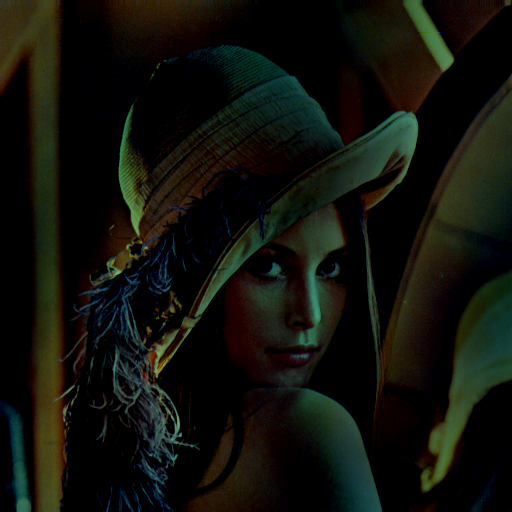

In [36]:
import scipy.fftpack as fp

def skaluj(dane):
    dane = abs(dane)+1
    dane = 20 * np.log(dane)
    dane = 255 * dane/ np.max(dane)
    dane = dane.astype(int)
    return dane

def deskaluj(dane):
    dane = abs(dane)+1
    dane = 20 * np.log(dane)
    dane = 255 * dane/ np.max(dane)
    dane = dane.astype(int)
    return dane

def fft_do_obraz(transformata):
    nowy_obraz = fp.irfft(fp.irfft(transformata,axis=0),axis=1)
    nowy_obraz = np.clip(nowy_obraz,0,255)
    nowy_obraz = macierz_do_obraz(nowy_obraz)
    return nowy_obraz

def obraz_do_fft(obraz,low_cut,high_cut):
    macierz = obraz_do_macierz(obraz)
    transformata = fp.rfft(fp.rfft(macierz,axis=0),axis=1)
    transformata[low_cut:high_cut,low_cut:high_cut,:] = 255
    #transformata = skaluj(transformata)
    #transformata = macierz_do_obraz(transformata)
    return transformata
fft_do_obraz(obraz_do_fft(wczytaj_obraz("Lena.png"),0,5))

<h3> Filtracja w dziedzinie częstotliwości </h3>